In [47]:
import pandas as pd

In [48]:
df_reg=pd.read_csv("regional_data.csv")
df_prov=pd.read_csv("province_data.csv")

In [49]:
df_reg.head()

,Date,Region_Code,Region_Name,Region_Latitude,Region_Longitude,Hospitalized_with_Symptoms,Intensive_Care,Total_Hospitalized,Tot_Home_Isolation,Total_Actually_Positive,New_Actually_Positive,Healed,Deceased,Total_Cases,Total_Medical_Swabs
0,2020-02-24 18:00:00,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,4,Trentino-Alto Adige,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [50]:
df_prov.head()

,Date,Region_Code,Region_Name,Province_Code,Province_Name,Province_GeoCode,Province_Latitude,Prov_Longitude,Total_Cases
0,2020-02-24 18:00:00,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24 18:00:00,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24 18:00:00,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24 18:00:00,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24 18:00:00,17,Basilicata,77,Matera,MT,40.667512,16.597924,0


In [51]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 15 columns):
Date                          1260 non-null object
Region_Code                   1260 non-null int64
Region_Name                   1260 non-null object
Region_Latitude               1260 non-null float64
Region_Longitude              1260 non-null float64
Hospitalized_with_Symptoms    1260 non-null int64
Intensive_Care                1260 non-null int64
Total_Hospitalized            1260 non-null int64
Tot_Home_Isolation            1260 non-null int64
Total_Actually_Positive       1260 non-null int64
New_Actually_Positive         1260 non-null int64
Healed                        1260 non-null int64
Deceased                      1260 non-null int64
Total_Cases                   1260 non-null int64
Total_Medical_Swabs           1260 non-null int64
dtypes: float64(2), int64(11), object(2)
memory usage: 147.7+ KB


In [52]:
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 9 columns):
Date                 6420 non-null object
Region_Code          6420 non-null int64
Region_Name          6420 non-null object
Province_Code        6420 non-null int64
Province_Name        6420 non-null object
Province_GeoCode     6360 non-null object
Province_Latitude    6420 non-null float64
Prov_Longitude       6420 non-null float64
Total_Cases          6420 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 451.5+ KB


handling nulls

In [53]:
df_prov[df_prov.isnull().any(axis=1)].head()

,Date,Region_Code,Region_Name,Province_Code,Province_Name,Province_GeoCode,Province_Latitude,Prov_Longitude,Total_Cases
15,2020-02-24 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,0
122,2020-02-25 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,0
229,2020-02-26 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,0
336,2020-02-27 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,3
443,2020-02-28 18:00:00,15,Campania,63,Napoli,NaN,40.839566,14.25085,4


In [54]:
df_prov.loc[df_prov.Province_Name=='Napoli','Province_GeoCode']='NA'

In [55]:
df_prov['Date']=pd.to_datetime(df_prov['Date'])
df_reg['Date']=pd.to_datetime(df_reg['Date'])

In [56]:
df_reg.nunique()

Date                            60
Region_Code                     20
Region_Name                     20
Region_Latitude                 21
Region_Longitude                21
Hospitalized_with_Symptoms     642
Intensive_Care                 329
Total_Hospitalized             676
Tot_Home_Isolation             814
Total_Actually_Positive        886
New_Actually_Positive          373
Healed                         521
Deceased                       468
Total_Cases                    921
Total_Medical_Swabs           1096
dtype: int64

handling duplicate region

In [57]:
dftest = df_reg[['Region_Name']]+df_reg[['Region_Latitude']].astype('str')

In [58]:
dftest=df_reg[['Region_Name']].copy()
dftest['Region_Name']=dftest['Region_Name']+df_reg['Region_Latitude'].astype('str')

In [59]:
dftest['Region_Name'].unique()

array(['Abruzzo42.35122196', 'Basilicata40.63947052',
       'Trentino-Alto Adige46.49933453', 'Calabria38.90597598',
       'Campania40.83956555', 'Emilia-Romagna44.49436681',
       'Friuli-Venezia Giulia45.6494354', 'Lazio41.89277044',
       'Liguria44.41149315', 'Lombardia45.46679409', 'Marche43.61675973',
       'Molise41.55774754', 'Piemonte45.0732745', 'Puglia41.12559576',
       'Sardegna39.21531192', 'Sicilia38.11569725', 'Toscana43.76923077',
       'Trentino-Alto Adige46.06893511', 'Umbria43.10675841',
       "Valle d'Aosta45.73750286", 'Veneto45.43490485'], dtype=object)

In [60]:
df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige'].groupby(['Region_Latitude']).count()

,Date,Region_Code,Region_Name,Region_Longitude,Hospitalized_with_Symptoms,Intensive_Care,Total_Hospitalized,Tot_Home_Isolation,Total_Actually_Positive,New_Actually_Positive,Healed,Deceased,Total_Cases,Total_Medical_Swabs
Region_Latitude,,,,,,,,,,,,,,
46.068935,60,60,60,60,60,60,60,60,60,60,60,60,60,60
46.499335,60,60,60,60,60,60,60,60,60,60,60,60,60,60


In [61]:
indeks=['Date','Hospitalized_with_Symptoms', 'Intensive_Care',
       'Total_Hospitalized', 'Tot_Home_Isolation', 'Total_Actually_Positive',
       'New_Actually_Positive', 'Healed', 'Deceased', 'Total_Cases',
       'Total_Medical_Swabs']

indeks2=['Hospitalized_with_Symptoms', 'Intensive_Care',
       'Total_Hospitalized', 'Tot_Home_Isolation', 'Total_Actually_Positive',
       'New_Actually_Positive', 'Healed', 'Deceased', 'Total_Cases',
       'Total_Medical_Swabs']

dftest=df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige',indeks].groupby(['Date']).sum()
dftest.set_index(df_reg.loc[(df_reg['Region_Latitude']<46.1)&(df_reg['Region_Name']=='Trentino-Alto Adige')].index, inplace=True)

for i in indeks2:
    df_reg.loc[(df_reg['Region_Latitude']<46.1)&(df_reg['Region_Name']=='Trentino-Alto Adige'),i]=dftest[i]


In [62]:
df_reg.drop(df_reg.loc[(df_reg['Region_Latitude']>46.4)&(df_reg['Region_Name']=='Trentino-Alto Adige')].index,inplace=True)

In [63]:
df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige','Region_Latitude']=46.4337
df_reg.loc[df_reg['Region_Name']=='Trentino-Alto Adige','Region_Longitude']=11.1693


In [64]:
df_prov['Province_Name'].unique()

array(['Chieti', "L'Aquila", 'Pescara', 'Teramo', 'Matera', 'Potenza',
       'Bolzano', 'Catanzaro', 'Cosenza', 'Crotone', 'Reggio di Calabria',
       'Vibo Valentia', 'Avellino', 'Benevento', 'Caserta', 'Napoli',
       'Salerno', 'Bologna', 'Ferrara', 'Forlì-Cesena', 'Modena', 'Parma',
       'Piacenza', 'Ravenna', "Reggio nell'Emilia", 'Rimini', 'Gorizia',
       'Pordenone', 'Trieste', 'Udine', 'Frosinone', 'Latina', 'Rieti',
       'Roma', 'Viterbo', 'Genova', 'Imperia', 'La Spezia', 'Savona',
       'Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi',
       'Mantova', 'Milano', 'Monza e della Brianza', 'Pavia', 'Sondrio',
       'Varese', 'Ancona', 'Ascoli Piceno', 'Fermo', 'Macerata',
       'Pesaro e Urbino', 'Campobasso', 'Isernia', 'Alessandria', 'Asti',
       'Biella', 'Cuneo', 'Novara', 'Torino', 'Verbano-Cusio-Ossola',
       'Vercelli', 'Bari', 'Barletta-Andria-Trani', 'Brindisi', 'Foggia',
       'Lecce', 'Taranto', 'Cagliari', 'Nuoro', 'Oristano', 'Sassari',
  

Computer performance

In [65]:
# import cProfile

In [66]:
# def slow_function():
#     total = 0.0
    
#     for i, _ in enumerate(range(10000)):
        
#         for j, _ in enumerate(range(1, 10000)):
#             total += (i * j)

#     return total

In [67]:
# cProfile.run('slow_function()', sort='time')

In [68]:
# %%timeit

# slow_function()

In [69]:
# import platform

In [70]:
# print(platform.machine())
# print(platform.version())
# print(platform.platform())
# print(platform.uname())
# print(platform.system())
# print(platform.processor())

In [71]:
# !pip install py-cpuinfo

In [72]:
# import cpuinfo

# from cpuinfo import get_cpu_info

# for key, value in get_cpu_info().items():
#     print("{0}: {1}".format(key, value))

In [73]:
!pip install wget

!pip install geopandas

!pip install descartes

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 931kB 12.2MB/s ta 0:00:01
    100% |████████████████████████████████| 10.9MB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 14.7MB 3.6MB/s eta 0:00:01
    100% |████████████████████████████████| 1.8MB 28.9MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [74]:
import wget

wget.download('http://biogeo.ucdavis.edu/data/diva/adm/ITA_adm.zip')

'ITA_adm (1).zip'

In [75]:
import pathlib
pathlib.Path().absolute()

PosixPath('/home/ec2-user/SageMaker/COVID-19-Italia')

In [76]:
import zipfile

with zipfile.ZipFile('ITA_adm.zip','r') as zip_ref:
    zip_ref.extractall(r'/home/ec2-user/SageMaker/COVID-19-Italia/ITA_adm')

In [77]:
import geopandas as gpd

fp = 'ITA_adm/ITA_adm2.shp'
map_df = gpd.read_file(fp)

map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,112,ITA,Italy,1,Abruzzo,1,Chieti,Provincia,Province,None,None,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
1,112,ITA,Italy,1,Abruzzo,2,L'Aquila,Provincia,Province,None,Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
2,112,ITA,Italy,1,Abruzzo,3,Pescara,Provincia,Province,None,None,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,112,ITA,Italy,1,Abruzzo,4,Teramo,Provincia,Province,None,None,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
4,112,ITA,Italy,2,Apulia,5,Bari,Provincia,Province,None,None,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40..."


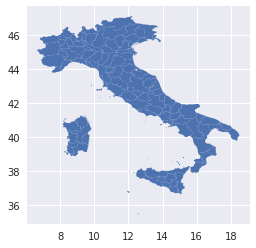

In [78]:
map_df.plot()

In [79]:
for i in map_df.NAME_2.unique():
    if not i in df_prov['Province_Name'].unique():
        print(i+'  gada\n')
    map_df.NAME_2.unique()

Reggio Di Calabria  gada

Forli' - Cesena  gada

Reggio Nell'Emilia  gada

Mantua  gada

Monza and Brianza  gada

Pesaro E Urbino  gada

Carbonia-Iglesias  gada

Medio Campidano  gada

Ogliastra  gada

Olbia-Tempio  gada

Syracuse  gada

Florence  gada

Padua  gada



In [80]:
prov1=[
    'Reggio Di Calabria',
    "Forli' - Cesena",
    "Reggio Nell'Emilia",
    'Mantua',
    'Monza and Brianza',
    'Pesaro E Urbino',
    'Carbonia-Iglesias',
    'Medio Campidano',
    'Ogliastra',
    'Olbia-Tempio',
    'Syracuse',
    'Florence',
    'Padua' 
]

prov2=[
    'Reggio di Calabria',
    'Forlì-Cesena',
    "Reggio nell'Emilia",
    'Mantova',
    'Monza e della Brianza',
    'Pesaro e Urbino',
    'Sud Sardegna',
    'Sud Sardegna',
    'Nuoro',
    'Sassari',
    'Siracusa',
    'Firenze',
    'Padova'
]

j=0
for i in prov1:
    map_df.loc[map_df['NAME_2']==i,'NAME_2']=prov2[0]
    j=j+1
    



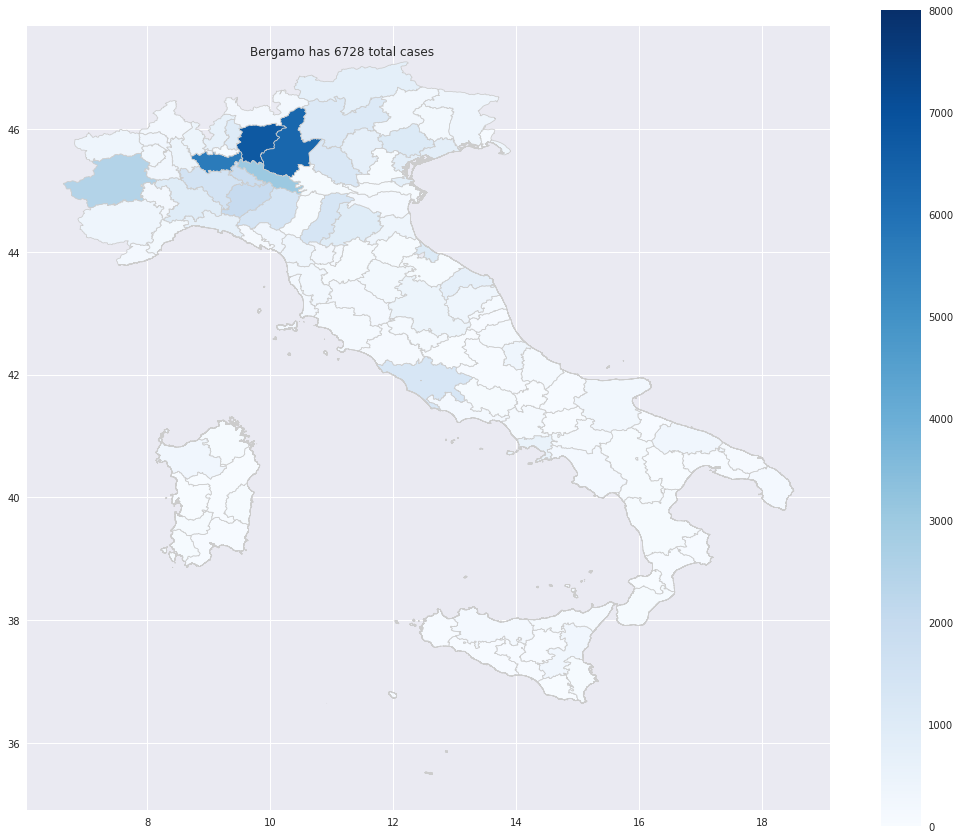

In [81]:
import matplotlib.pyplot as plt

data_for_map=df_prov.loc[df_prov['Date']=='2020-03-24 17:00:00'].copy()

merged = map_df.join(data_for_map.set_index('Province_Name'), on='NAME_2')
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Cases'
# set the range for the choropleth
vmin, vmax = 0, 8000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Total_Cases' : 8000 } , ignore_index=True)



#get province with highest total cases

plt.text(merged.loc[44,'Prov_Longitude'],47.2,merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

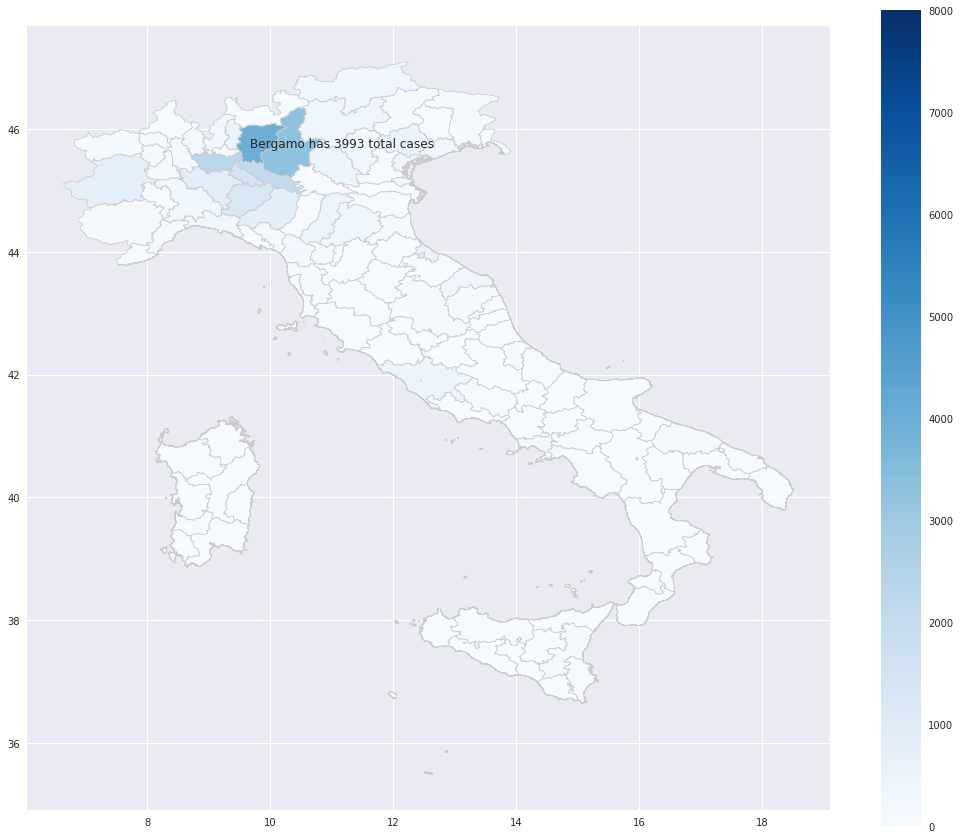

In [82]:
import matplotlib.pyplot as plt

data_for_map=df_prov.loc[df_prov['Date']=='2020-03-17 17:00:00'].copy()

# merged = map_df.set_index('NAME_2').join(data_for_map.set_index('Province_Name'))
# merged.head()

merged = map_df.join(data_for_map.set_index('Province_Name'), on='NAME_2')
merged.head()



# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Cases'
# set the range for the choropleth
vmin, vmax = 0, 8000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 15))

merged=merged.append({'Total_Cases' : 8000 } , ignore_index=True)



#get province with highest total cases
plt.text(merged.loc[44,'Prov_Longitude'],merged.loc[44,'Province_Latitude'],merged.loc[44,'NAME_2']+' has '+str(int(merged.loc[44,'Total_Cases']))+' total cases')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [104]:
col = df_reg.Region_Name.unique()
for i in col:
    df_reg.loc[df_reg['Region_Name'] == i, 'New_Deceased'] = np.array((0, *np.diff(df_reg.loc[df_reg['Region_Name'] == i, 'Deceased'])))
    df_reg.loc[df_reg['Region_Name'] == i, 'New_Healed'] = np.array((0, *np.diff(df_reg.loc[df_reg['Region_Name'] == i, 'Healed'])))
    df_reg.loc[df_reg['Region_Name'] == i, 'New_Medical_Swabs'] = np.array((0, *np.diff(df_reg.loc[df_reg['Region_Name'] == i, 'Total_Medical_Swabs'])))

In [105]:
df_reg.loc[df_reg['Region_Name']=='Campania'].head(50)

,Date,Region_Code,Region_Name,Region_Latitude,Region_Longitude,Hospitalized_with_Symptoms,Intensive_Care,Total_Hospitalized,Tot_Home_Isolation,Total_Actually_Positive,New_Actually_Positive,Healed,Deceased,Total_Cases,Total_Medical_Swabs,New_Deceased,New_Healed,New_Medical_Swabs
4,2020-02-24 18:00:00,15,Campania,40.839566,14.25085,0,0,0,0,0,0,0,0,0,10,0.0,0.0,0.0
25,2020-02-25 18:00:00,15,Campania,40.839566,14.25085,0,0,0,0,0,0,0,0,0,10,0.0,0.0,0.0
46,2020-02-26 18:00:00,15,Campania,40.839566,14.25085,0,0,0,0,0,0,0,0,0,10,0.0,0.0,0.0
67,2020-02-27 18:00:00,15,Campania,40.839566,14.25085,2,0,2,1,3,3,0,0,3,10,0.0,0.0,0.0
88,2020-02-28 18:00:00,15,Campania,40.839566,14.25085,2,0,2,2,4,1,0,0,4,213,0.0,0.0,203.0
109,2020-02-29 17:00:00,15,Campania,40.839566,14.25085,3,0,3,10,13,9,0,0,13,373,0.0,0.0,160.0
130,2020-03-01 17:00:00,15,Campania,40.839566,14.25085,4,0,4,13,17,4,0,0,17,373,0.0,0.0,0.0
151,2020-03-02 18:00:00,15,Campania,40.839566,14.25085,4,0,4,13,17,0,0,0,17,373,0.0,0.0,0.0
172,2020-03-03 18:00:00,15,Campania,40.839566,14.25085,11,0,11,19,30,13,0,0,30,405,0.0,0.0,32.0
193,2020-03-04 17:00:00,15,Campania,40.839566,14.25085,11,0,11,20,31,1,0,0,31,429,0.0,0.0,24.0


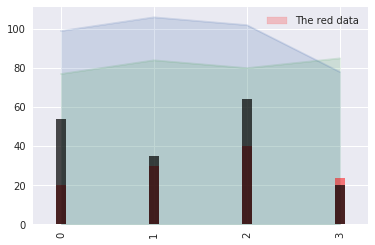

In [83]:

# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()

# pal = sns.color_palette("Set1")
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

# Peak Temperature data for two cities

tempData    = {"City1":[99, 106, 102, 78],

               "City2":[77, 84, 80, 85]};

# Seasons              

seasons     = ("Spring", "Summer", "Fall", "Winter")

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
 'abnormal' : [90,40,30,30],
 'fix' : [60,70,65,70],
 'normal' : [54,35,64,20],
 'bad_rate' : [20,30,40,24]})

#Draw an area plot for the DataFrame data

dataFrame.plot(kind='area', stacked=False,alpha=0.2)
m1_t['bad_rate'].plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
m1_t['normal'].plot(kind='bar', stacked=False,alpha=0.7,width=0.1,color='black')

red_patch = mpatches.Patch(color='red',alpha=0.2, label='The red data')
plot.legend(handles=[red_patch])





plot.show(block=True);

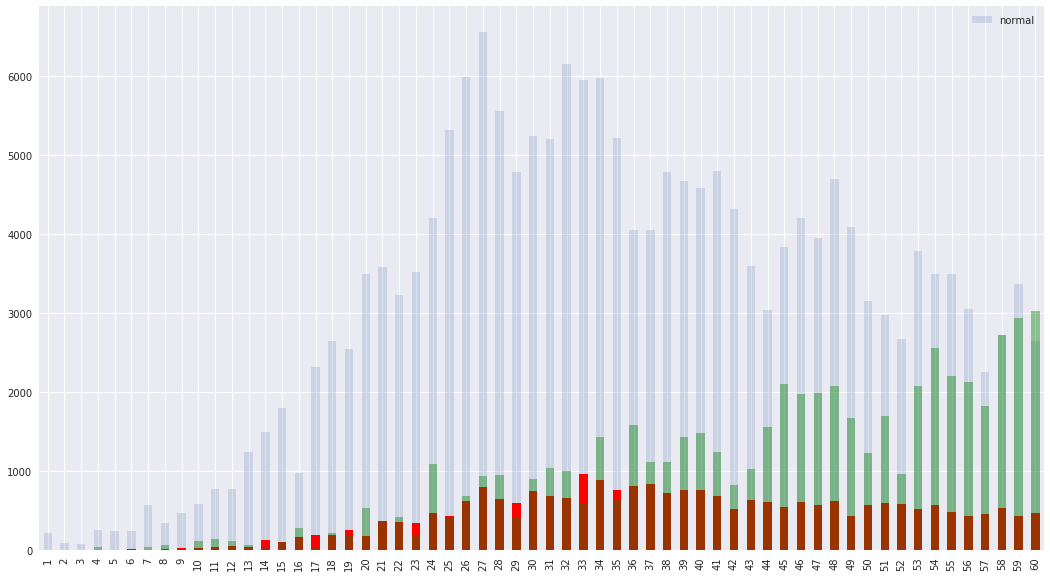

In [166]:

# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()

# pal = sns.color_palette("Set1")
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

# Peak Temperature data for two cities

tempData    = {"Total Positive":np.array(df_reg.groupby('Date')['Total_Actually_Positive'].sum()),

               "Total Deceased":np.array(df_reg.groupby('Date')['Deceased'].sum()),
               
               "Deceased":np.array(df_reg.groupby('Date')['New_Deceased'].sum()),
              
               "Healed":np.array(df_reg.groupby('Date')['New_Healed'].sum())};


# Seasons              

seasons     = range(1,61)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
#  'abnormal' : [90,40,30,30],
#  'fix' : [60,70,65,70],
 'normal' : np.array(df_reg.groupby('Date')['New_Actually_Positive'].sum())
#   'bad_rate' : [20,30,40,24]
},index=seasons)

# #Draw an area plot for the DataFrame data
# dataFrame.plot(figsize=(18,10),kind='area', stacked=False,alpha=0.7)
# # df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
# m1_t['normal'].plot(secondary_y=True,kind='bar', stacked=False,alpha=0.7,color='black')

#Draw an area plot for the DataFrame data
m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.2)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
dataFrame['Deceased'].plot(kind='bar', stacked=False,alpha=1,color='red')
dataFrame['Healed'].plot(kind='bar', stacked=False,alpha=0.4,color='Green')

# dataFrame['Total Positive'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='black')
# dataFrame['Total Deceased'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='red')


# red_patch = mpatches.Patch(color='red',alpha=0.2, label='The red data')
# plot.legend(handles=[red_patch])






plot.show(block=True);

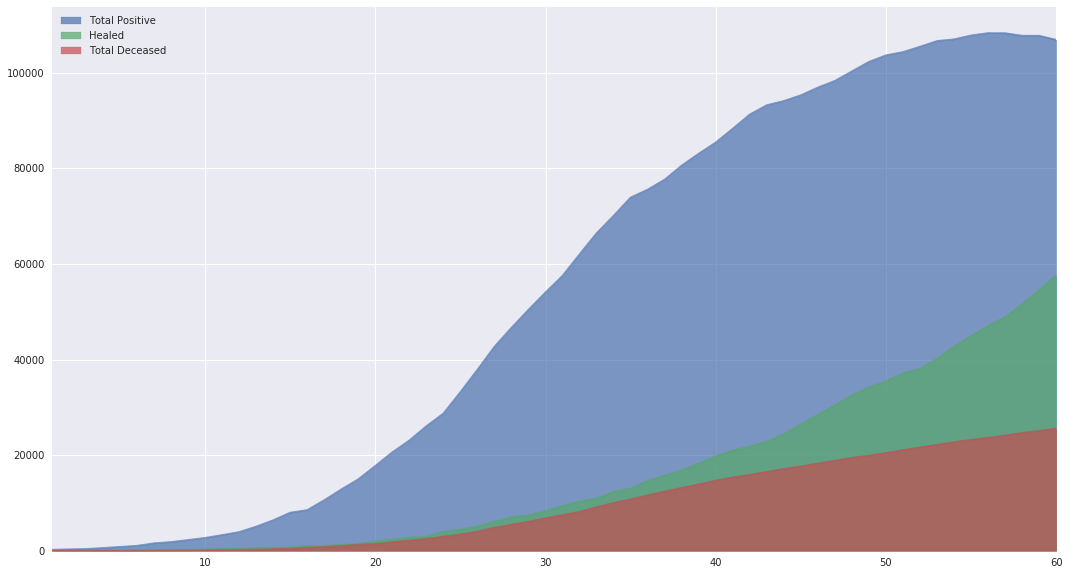

In [169]:
# Example Python program to draw an overlapped area plot

# for a pandas DataFrame

import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plot

sns.set()

# pal = sns.color_palette("Set1")
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

# Peak Temperature data for two cities

tempData    = {"Total Positive":np.array(df_reg.groupby('Date')['Total_Actually_Positive'].sum()),

               
               
            
              
               "Healed":np.array(df_reg.groupby('Date')['Healed'].sum()),
              "Total Deceased":np.array(df_reg.groupby('Date')['Deceased'].sum())};


# Seasons              

seasons     = range(1,61)

 

# Create a DataFrame instance

dataFrame   = pd.DataFrame(tempData, index=seasons)

m1_t = pd.DataFrame({
#  'abnormal' : [90,40,30,30],
#  'fix' : [60,70,65,70],
 'normal' : np.array(df_reg.groupby('Date')['New_Actually_Positive'].sum())
#   'bad_rate' : [20,30,40,24]
},index=seasons)

#Draw an area plot for the DataFrame data
dataFrame.plot(figsize=(18,10),kind='area', stacked=False,alpha=0.7)
# df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
# m1_t['normal'].plot(secondary_y=True,kind='bar', stacked=False,alpha=0.7,color='black')

# #Draw an area plot for the DataFrame data
# m1_t.plot(figsize=(18,10),kind='bar', stacked=False,alpha=0.2)
# # df_reg.groupby('Date')['New_Actually_Positive'].sum().plot(kind='bar', stacked=False,alpha=0.5,width=0.1,color='red')
# dataFrame['Deceased'].plot(kind='bar', stacked=False,alpha=1,color='red')
# dataFrame['Healed'].plot(kind='bar', stacked=False,alpha=0.4,color='Green')

# dataFrame['Total Positive'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='black')
# dataFrame['Total Deceased'].plot(secondary_y=True,kind='area', stacked=False,alpha=0.2,color='red')


# red_patch = mpatches.Patch(color='red',alpha=0.2, label='The red data')
# plot.legend(handles=[red_patch])






plot.show(block=True);

In [131]:
dataFrame.head()

,Total Cases,Total Deceased
2020-02-24 18:00:00,229,7
2020-02-25 18:00:00,322,10
2020-02-26 18:00:00,400,12
2020-02-27 18:00:00,650,17
2020-02-28 18:00:00,888,21


In [137]:
for i in range (1,5):
    print(i)

1
2
3
4
